In [1]:
import numpy, scipy, scipy.ndimage
from scipy.ndimage import filters
from scipy.ndimage import measurements
from numpy import *
import cv2 as cv
import sys
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import imageio

In [19]:
## nonmaximum suppression
# Gm: gradient magnitudes
# Gd: gradient directions, -pi/2 to +pi/2
# return: nms, gradient magnitude if local max, 0 otherwise
def nonmaxsupress(Gm, Gd, th=1.0):
    nms = zeros(Gm.shape, Gm.dtype)   
    h,w = Gm.shape    
    for x in range(1, w-1):
        for y in range(1, h-1):            
            mag = Gm[y,x]
            if mag < th: continue        
            teta = Gd[y,x]            
            dx, dy = 0, -1      # abs(orient) >= 1.1781, teta < -67.5 degrees and teta > 67.5 degrees
            if abs(teta) <= 0.3927: dx, dy = 1, 0       # -22.5 <= teta <= 22.5
            elif teta < 1.1781 and teta > 0.3927: dx, dy = 1, 1     # 22.5 < teta < 67.5 degrees
            elif teta > -1.1781 and teta < -0.3927: dx, dy = 1, -1  # -67.5 < teta < -22.5 degrees            
            if mag > Gm[y+dy,x+dx] and mag > Gm[y-dy,x-dx]: nms[y,x] = mag    
    return nms

In [20]:
def hysteresisThreshold(nms, thLow, thHigh, binaryEdge = True):
    print("hysteresis")
    labels, n = measurements.label(nms > thLow, structure=ones((3,3)))
    for i in range(1, n):
        upper = amax(nms[labels==i])
        if upper < thHigh: labels[labels==i] = 0
    if binaryEdge: return 255*(labels>0)        
    else: return nms*(labels>0)

In [41]:

def detect_rgb(image, thLow, thHigh, gtype=0, binaryEdge=True):
    print("dete_rgb")
    Gm, Gd = rgb_gradient(image, gtype) 
    #print 'Gm max:', Gm.max(), mean(Gm)
    nms = nonmaxsupress(Gm, Gd, th=1.0)
    print(type(nms))
    #fr = getFractile(nms, th=1.0, fraction=0.50, bins=255)
    #print 'Fractile:', fr, thLow, thHigh
    edge = hysteresisThreshold(nms, thLow, thHigh, binaryEdge)
    return edge, nms

In [24]:
def gradient(image, type=0):
    print("gradinet")
    if type==0:
        Ix = filters.sobel(image, axis=1)
        Iy = filters.sobel(image, axis=0)
        return Ix, Iy
    else:
        Ix = filters.prewitt(image, axis=1)
        Iy = filters.prewitt(image, axis=0)
    return Ix, Iy

In [25]:

# gradient magnitudes and directions of a grayscale image, Gd: [-pi/2, +pi/2]
def gray_gradient(image):
    print("gray_gra")
    Gx, Gy = gradient(image)
    Gm = sqrt(Gx**2+Gy**2)
    Gd = arctan2(Gy, Gx)    
    Gd[Gd > 0.5*numpy.pi] -= numpy.pi
    Gd[Gd < -0.5*numpy.pi] += numpy.pi
    return Gm, Gd

In [28]:
# maximum gradient for each pixel in all the channels
def multi_gradient_max(imgs):
    print("multi_grad_max")
    N=len(imgs)      
    Gm,Gd = gray_gradient(imgs[0])
    for i in range(1, N):
        Gm2, Gd2 = gray_gradient(imgs[i])        
        ind= Gm2>Gm
        Gm[ind] = Gm2[ind]       
        Gd[ind] = Gd2[ind]
    return Gm, Gd

In [29]:
# gradient magnitude from an RGB image
# type: 0 (color tensor), else (max)
def rgb_gradient(image, gtype=0, sigma=0.5):
    print("rgb_grad")
    r = image[:,:,0].astype('float32')
    g = image[:,:,1].astype('float32')
    b = image[:,:,2].astype('float32')
    
    imgs=[]
    imgs.append(r)
    imgs.append(g)
    imgs.append(b)
    
    if gtype == 0:
        return multi_gradient(imgs, sigma)
    else:
        return multi_gradient_max(imgs)

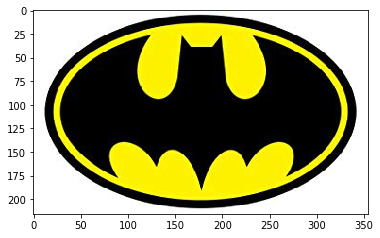

In [36]:
img = imageio.imread('lena4.jpg')
plt.imshow(img)

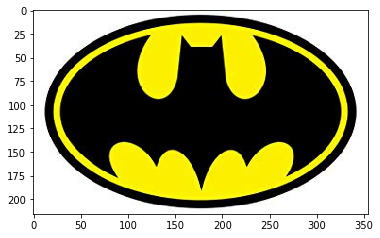

In [37]:
sigma = .2
image = scipy.ndimage.filters.gaussian_filter(img, sigma)
plt.imshow(image)

In [38]:
tlow = 10
thigh = 10
edge = detect_rgb(image, tlow, thigh, 1)
#plt.imshow(edge)

dete_rgb
rgb_grad
multi_grad_max
gray_gra
gradinet
gray_gra
gradinet
gray_gra
gradinet
<class 'numpy.ndarray'>
hysteresis


In [39]:
edge1 = edge[0]
edge2 = edge[1]

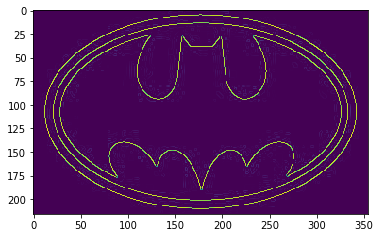

In [40]:
plt.imshow(edge2)

(350, 525, 3)


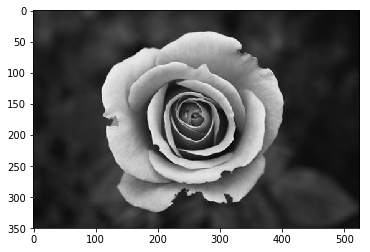

In [100]:
img = imageio.imread('lena5.jpeg')
sigma = .2
image = scipy.ndimage.filters.gaussian_filter(img, sigma)
plt.imshow(image)
print(shape(image))
#edge = detect_gray(image, 100, 200)

In [103]:
R = np.array(image[:, :, 0])
G = np.array(image[:, :, 1])
B = np.array(image[:, :, 2])

In [106]:
Y = 0.299*R + 0.587*G + 0.114*B 

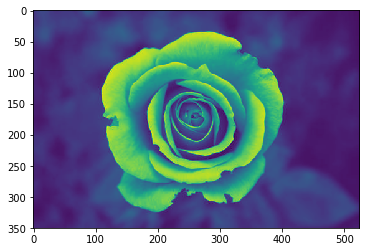

In [108]:
plt.imshow(Y)

In [110]:
edge = detect_gray(image, tlow, thigh)

ValueError: too many values to unpack (expected 2)

In [ ]:
imageC = scipy.misc.imread(sys.argv[1])
scipy.misc.imshow(imageC)
# scipy.misc.title('input image'); scipy.misc.draw()
if len(imageC.shape)==2: gray()
  
#image = scipy.misc.imread(sys.argv[1], True)
image = scipy.misc.imread(sys.argv[1], False)
print(type(image))
sigma = 2.0
image = scipy.ndimage.filters.gaussian_filter(image, sigma)
scipy.misc.imshow(imageC)
imgMax=image.max()
if imgMax > 255:
     image *= (255.0/65535)
     print('Image max value:', imgMax)
    
tlow=100
thigh=200
if argc==4:
    tlow=float(sys.argv[2])
    thigh=float(sys.argv[3])
    
    #edge = detect_gray(image, tlow, thigh)
edge = detect_rgb(image, tlow, thigh, 1)
print(edge)
    #edge = detect_rgb(image, 28, 57, 1)
scipy.misc.imshow(edge)
figure(); imshow(edge); gray()
show()


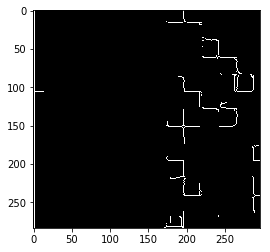

In [124]:
import cv2
import matplotlib.pyplot as plt
 
im = cv2.imread('lena5.png')
edges = cv2.Canny(im,25,255,L2gradient=False)
plt.imshow(edges,cmap='gray')
plt.show()